In [29]:
from fastai import *
from fastai.vision import *

PATH = Path('../..').resolve()

seed = 12345

%matplotlib inline

In [114]:
a40 = (
    pd.read_csv(f'{PATH}/data/a40.datafile3.csv').join(
        pd.read_csv(f'{PATH}/data/a40.datafile1.csv').rename(columns={'logMsun': 'logMHI'}).set_index('AGCNr'),
        on='AGCNr', rsuffix='_sdss'
    )
    .rename(columns={'PhotoObjID': 'DR7ObjID'})
)


sdss =  pd.read_csv(f'{PATH}/data/SDSS_basic_data.csv')

sdss.rename(columns={'lgm_tot_p50': 'logMstar'}, inplace=True)
sdss.drop_duplicates(subset='DR7ObjID', keep=False, inplace=True)         # for some reason there are ~10 duplicate IDs
sdss = sdss[(sdss.logMstar > 0) & (sdss.logMstar.notna())].copy()
sdss = sdss[['DR7ObjID', 'logMstar']].copy()

a40 = a40.join(sdss.set_index('DR7ObjID'), on='DR7ObjID', how='left', rsuffix='_sdss')
a40 = joined[joined.logMstar.notna()].copy()

a40['logfgas'] = joined.logMHI - joined.logMstar

In [120]:
a100 = pd.read_csv(f'{PATH}/data/a.100_SDSS.csv')
a100_orig = pd.read_csv(f'{PATH}/data/a100.code12.tab1.180315.csv')
sdss = pd.read_csv(f'{PATH}/data/SDSS_basic_data.csv').drop_duplicates(subset='DR7ObjID', keep=False).sample(50000)

Note that the SDSS *spectroscopic* footprint (upon which the MPA-JHU catalogs are built) mostly sits in one contiguous part of the sky. The 40% ALFALFA catalog contains stellar mass estimates on the other part of the sky.

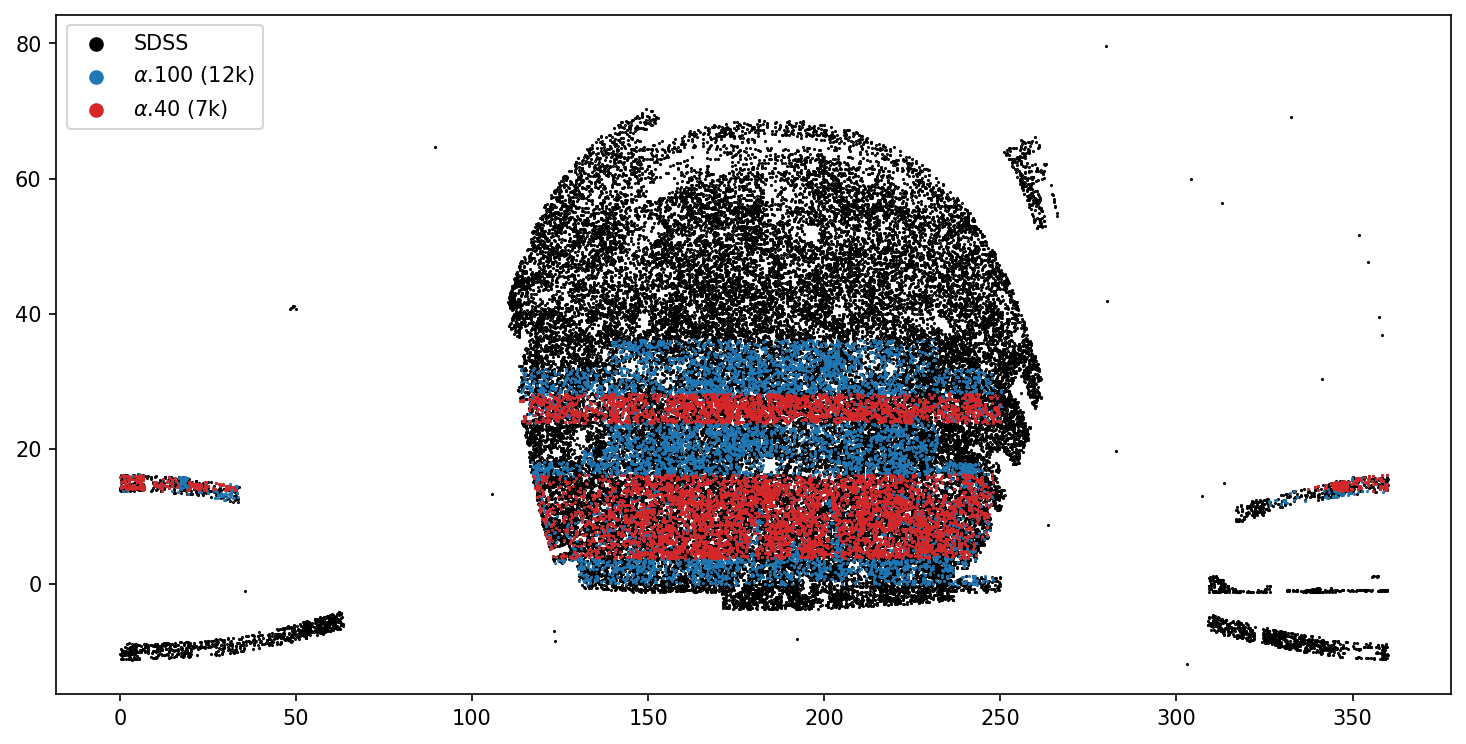

In [123]:
plt.figure(figsize=(12, 6), dpi=150)
# plt.scatter(a100_orig.RAdeg_OC, a100_orig.DECdeg_OC, c='k', marker='.', s=5,  label=r'$\alpha$.100 (original)')
plt.scatter(sdss.ra, sdss.dec, c='k', marker='.', s=1, label=r'SDSS')
plt.scatter(a100.RAdeg_OC, a100.DECdeg_OC, c='C0', marker='.', s=1,  label=r'$\alpha$.100 (12k)')
plt.scatter(a40.RAdeg_OC, a40.DECdeg_OC, c='C3', marker='.', s=1, label=r'$\alpha$.40 (7k)')

plt.legend(markerscale=12)